# Cifar-10 이미지 분류 v1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed=2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [3]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

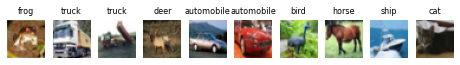

In [5]:
plt.figure(figsize=(8,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i]),plt.axis('off')
    plt.title(class_names[y_train[i,0]],fontsize=8)
plt.show()

In [6]:
#xdata -scaling
X_train=X_train/255.
X_test=X_test/255.


In [7]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test=to_categorical(y_test)

- 모델 정의/학습/평가

In [8]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D,Flatten, MaxPooling2D, Dropout
#flatten - 3차원인 conv2D를 1차원인 dense, fully connected layer로 
#넣어야 하기 때문에 차원 축소를 할 때 필요.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [9]:
model =Sequential([
                   Conv2D(32, kernel_size=(3,3), input_shape=(32,32,3),padding='same',activation='relu'),
                    #= MaxPooling2D(pool_size=(2,2))
                   # input_shape=(32,32,3) = X_train.shape[1:]
                    Conv2D(32, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'),
                    Conv2D(64, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.25),
                    Flatten(), #24,24,64에서 1차원 512개의 노드로.
                    Dense(512,activation='relu'),
                    Dropout(0.5),
                    Dense(10,activation='softmax')
])
model.summary()

#18496=32 x 3 x 3 x 64 + 64

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [10]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001,decay=1e-6),
              loss='categorical_crossentropy',metrics=['accuracy'])


In [11]:
model_path = 'best-cifar10-v1.h5'
mc=ModelCheckpoint(model_path,save_best_only=True,verbose=1)
es=EarlyStopping(patience=10)

In [12]:
hist=model.fit(
    X_train,Y_train,validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[mc,es]

)

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 1.8292 - accuracy: 0.3282
Epoch 1: val_loss improved from inf to 1.57669, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 17s 5ms/step - loss: 1.8292 - accuracy: 0.3282 - val_loss: 1.5767 - val_accuracy: 0.4251
Epoch 2/100
1239/1250 [============================>.] - ETA: 0s - loss: 1.5213 - accuracy: 0.4431
Epoch 2: val_loss improved from 1.57669 to 1.37884, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5207 - accuracy: 0.4435 - val_loss: 1.3788 - val_accuracy: 0.5031
Epoch 3/100
1242/1250 [============================>.] - ETA: 0s - loss: 1.3933 - accuracy: 0.4943
Epoch 3: val_loss improved from 1.37884 to 1.27047, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3929 - accuracy: 0.4946 - val_loss: 1.2705 - val_accuracy: 0.5518
Epoch 4/100
1243/1250 [=======================